In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
NUM_CLASSES = 10 #Number of classes

RESHAPED = 784 #Reshape 28*28 pixel to flatten array of 784 pixels

In [11]:
HIDDEN_NEURONS = 256

In [3]:
fashion_data = tf.keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()
train_images = train_images.reshape(60000, RESHAPED)
test_images = test_images.reshape(10000, RESHAPED)

train_images, test_images = train_images/255.0, test_images/255.0


4422102/4422102 [==============================] - 1s 0us/step


In [6]:
#one hot rerpresentations for labels

train_labels = tf.keras.utils.to_categorical(train_labels, NUM_CLASSES)
test_labels = tf.keras.utils.to_categorical(test_labels, NUM_CLASSES)

In [7]:
#define architecture of our CNN
class cnn_fmnist:
  @staticmethod
  def build(input_shape, classes):
    model = Sequential([
        Dense(classes, input_shape = input_shape, name = 'dense_layer', activation = 'softmax')
    ])
    return model

In [8]:
model = cnn_fmnist.build(input_shape=(RESHAPED,), classes = NUM_CLASSES)

model.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics= ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# model = cnn_fmnist.build(input_shape=(RESHAPED,), classes = NUM_CLASSES)
# model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# import train, optimizer, compile, train
##Train the model
#Constants

BATCH_SIZE = 128
EPOCHS = 200
VALIDATION_SPLIT = .2

model.fit(train_images, train_labels, batch_size= BATCH_SIZE, epochs = EPOCHS, validation_split = VALIDATION_SPLIT)

Epoch 1/200
375/375 [==============================] - 3s 4ms/step - loss: 1.2413 - accuracy: 0.6249 - val_loss: 0.9001 - val_accuracy: 0.7150
Epoch 2/200
375/375 [==============================] - 1s 3ms/step - loss: 0.8306 - accuracy: 0.7369 - val_loss: 0.7606 - val_accuracy: 0.7573
Epoch 3/200
375/375 [==============================] - 1s 3ms/step - loss: 0.7341 - accuracy: 0.7683 - val_loss: 0.6960 - val_accuracy: 0.7778
Epoch 4/200
375/375 [==============================] - 1s 3ms/step - loss: 0.6818 - accuracy: 0.7841 - val_loss: 0.6566 - val_accuracy: 0.7905
Epoch 5/200
375/375 [==============================] - 1s 3ms/step - loss: 0.6472 - accuracy: 0.7939 - val_loss: 0.6297 - val_accuracy: 0.7977
Epoch 6/200
375/375 [==============================] - 1s 3ms/step - loss: 0.6221 - accuracy: 0.8016 - val_loss: 0.6088 - val_accuracy: 0.8011
Epoch 7/200
375/375 [==============================] - 1s 3ms/step - loss: 0.6027 - accuracy: 0.8069 - val_loss: 0.5923 - val_accuracy: 0.8065

In [10]:
#Evaluation

test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy ", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4473 - accuracy: 0.8434
Test accuracy  0.8434000015258789


In [12]:
#Improvements to the NN, adding Hidden layers and changing activation function and optimizer

#define architecture of our CNN
class cnn_fmnist:
  @staticmethod
  def build(input_shape, classes):
    model = Sequential([
        Dense(HIDDEN_NEURONS, input_shape = input_shape, name = 'Dense_layer1', activation = 'relu'),
        Dense(HIDDEN_NEURONS, input_shape = input_shape, name = 'Dense_layer2', activation = 'relu'),
        Dense(classes, name = 'output_layer', activation = 'softmax')

    ])
    return model

In [13]:
model = cnn_fmnist.build(input_shape=(RESHAPED,), classes = NUM_CLASSES)

model.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics= ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_layer1 (Dense)        (None, 256)               200960    
                                                                 
 Dense_layer2 (Dense)        (None, 256)               65792     
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# import train, optimizer, compile, train
##Train the model
#Constants

BATCH_SIZE = 128
EPOCHS = 200
VALIDATION_SPLIT = .2



In [15]:
model.fit(train_images, train_labels, batch_size= BATCH_SIZE, epochs = EPOCHS, validation_split = VALIDATION_SPLIT)

Epoch 1/200
375/375 [==============================] - 3s 4ms/step - loss: 1.1688 - accuracy: 0.6498 - val_loss: 0.7711 - val_accuracy: 0.7463
Epoch 2/200
375/375 [==============================] - 1s 4ms/step - loss: 0.6995 - accuracy: 0.7654 - val_loss: 0.6305 - val_accuracy: 0.7907
Epoch 3/200
375/375 [==============================] - 1s 3ms/step - loss: 0.6016 - accuracy: 0.7999 - val_loss: 0.5667 - val_accuracy: 0.8083
Epoch 4/200
375/375 [==============================] - 1s 4ms/step - loss: 0.5498 - accuracy: 0.8151 - val_loss: 0.5283 - val_accuracy: 0.8214
Epoch 5/200
375/375 [==============================] - 1s 4ms/step - loss: 0.5175 - accuracy: 0.8231 - val_loss: 0.5070 - val_accuracy: 0.8263
Epoch 6/200
375/375 [==============================] - 1s 4ms/step - loss: 0.4955 - accuracy: 0.8308 - val_loss: 0.4964 - val_accuracy: 0.8249
Epoch 7/200
375/375 [==============================] - 1s 4ms/step - loss: 0.4794 - accuracy: 0.8344 - val_loss: 0.4806 - val_accuracy: 0.8295

In [16]:
#Evaluation

test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy ", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3443 - accuracy: 0.8869
Test accuracy  0.886900007724762


In [17]:
model = cnn_fmnist.build(input_shape=(RESHAPED,), classes = NUM_CLASSES)

model.compile(optimizer = 'RMSProp', loss = 'categorical_crossentropy', metrics= ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_layer1 (Dense)        (None, 256)               200960    
                                                                 
 Dense_layer2 (Dense)        (None, 256)               65792     
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.fit(train_images, train_labels, batch_size= BATCH_SIZE, epochs = EPOCHS, validation_split = VALIDATION_SPLIT)

Epoch 1/200
375/375 [==============================] - 3s 4ms/step - loss: 0.5787 - accuracy: 0.7908 - val_loss: 0.4121 - val_accuracy: 0.8512
Epoch 2/200
375/375 [==============================] - 1s 4ms/step - loss: 0.3968 - accuracy: 0.8532 - val_loss: 0.3685 - val_accuracy: 0.8647
Epoch 3/200
375/375 [==============================] - 1s 3ms/step - loss: 0.3485 - accuracy: 0.8694 - val_loss: 0.3649 - val_accuracy: 0.8695
Epoch 4/200
375/375 [==============================] - 1s 3ms/step - loss: 0.3197 - accuracy: 0.8804 - val_loss: 0.3716 - val_accuracy: 0.8653
Epoch 5/200
375/375 [==============================] - 1s 3ms/step - loss: 0.3008 - accuracy: 0.8880 - val_loss: 0.3559 - val_accuracy: 0.8737
Epoch 6/200
375/375 [==============================] - 1s 4ms/step - loss: 0.2796 - accuracy: 0.8946 - val_loss: 0.3514 - val_accuracy: 0.8763
Epoch 7/200
375/375 [==============================] - 2s 4ms/step - loss: 0.2670 - accuracy: 0.8993 - val_loss: 0.3329 - val_accuracy: 0.8828

In [19]:
#Evaluation

test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy ", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 2.1998 - accuracy: 0.8898
Test accuracy  0.8898000121116638


In [20]:
model = cnn_fmnist.build(input_shape=(RESHAPED,), classes = NUM_CLASSES)

model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_layer1 (Dense)        (None, 256)               200960    
                                                                 
 Dense_layer2 (Dense)        (None, 256)               65792     
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.fit(train_images, train_labels, batch_size= BATCH_SIZE, epochs = EPOCHS, validation_split = VALIDATION_SPLIT)

Epoch 1/200
375/375 [==============================] - 3s 4ms/step - loss: 0.5302 - accuracy: 0.8150 - val_loss: 0.4377 - val_accuracy: 0.8422
Epoch 2/200
375/375 [==============================] - 1s 4ms/step - loss: 0.3729 - accuracy: 0.8656 - val_loss: 0.3554 - val_accuracy: 0.8737
Epoch 3/200
375/375 [==============================] - 1s 4ms/step - loss: 0.3298 - accuracy: 0.8803 - val_loss: 0.3454 - val_accuracy: 0.8796
Epoch 4/200
375/375 [==============================] - 1s 4ms/step - loss: 0.3025 - accuracy: 0.8889 - val_loss: 0.3427 - val_accuracy: 0.8753
Epoch 5/200
375/375 [==============================] - 1s 4ms/step - loss: 0.2878 - accuracy: 0.8941 - val_loss: 0.3195 - val_accuracy: 0.8833
Epoch 6/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2732 - accuracy: 0.8973 - val_loss: 0.3295 - val_accuracy: 0.8819
Epoch 7/200
375/375 [==============================] - 2s 4ms/step - loss: 0.2597 - accuracy: 0.9031 - val_loss: 0.3213 - val_accuracy: 0.8847

In [22]:
#Evaluation

test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy ", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.2478 - accuracy: 0.8940
Test accuracy  0.8939999938011169


In [24]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [25]:
IMG_ROWS, IMG_COLS = 28, 28

TypeError: unhashable type: 'numpy.ndarray'

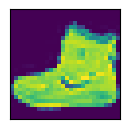

In [29]:
#Visualization

#Dict for each label

labels = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

plt.figure(figsize=(10,10))
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i].reshape((IMG_ROWS, IMG_COLS)))
  label_index = train_labels[i]
  plt.title(labels[label_index])

plt.show()